In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [5]:
df = pd.read_csv(r"C:\Users\dece2\OneDrive\Desktop\Data_Analysis_projects\SuperStore\train.csv")
#filling Missed Value
df['Postal Code'] = df['Postal Code'].fillna(0)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
if (df.duplicated().sum() > 0):
    print('dublicate exists')
else:
    print('dublicate not exists')

dublicate not exists


Order vs. Ship Date Lag


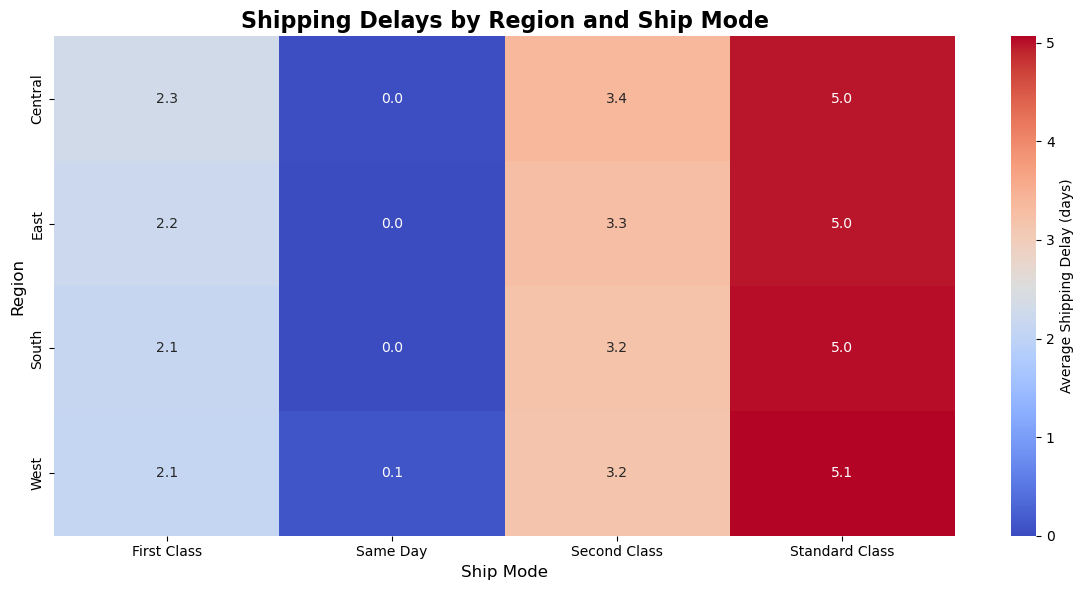

In [8]:
# Ensure Ship Date is in datetime format 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Calculate shipping lag
df['Shipping Lag'] = (df['Ship Date'] - df['Order Date']).dt.days

# Group by Region and Ship Mode to get the mean shipping lag
shipping_delay = df.groupby(['Region', 'Ship Mode'])['Shipping Lag'].mean().reset_index()

# Visualize using a Heatmap
# Pivot the data to make 'Region' the index, 'Ship Mode' the columns, and 'Shipping Lag' the values
delay_pivot = shipping_delay.pivot(index='Region', columns='Ship Mode', values='Shipping Lag')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    delay_pivot,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    cbar_kws={'label': 'Average Shipping Delay (days)'}
)
plt.title('Shipping Delays by Region and Ship Mode', fontsize=16, fontweight='bold')
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()
